# CSI4142 Assignment 1

1. Andrew Pham - 300226985
2. Kevin Yao -

In [92]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset 1 - Google Play Store Apps

### Description
- Name: Google Play Store Apps
- Author: Lavanya Gupta
- Purpose: Measures the happiness of countries scored according to economic production, social support, etc., over the years (2015-2019)
- Shape: 10841 rows, 13 columns
- Features:
    - `App`: quasi-unique identifier, represents the application name
    - `Category`: categorical feature, represents the category the app belongs to
    - `Rating`: numerical feature, represents the overall user rating of the app (1.0-5.0)
    - `Reviews`: numerical feature, represents the number of user reviews for the app
    - `Size`: quasi-numerical feature, represents the size of the app on disk
    - `Installs`: categorical feature, represents the number of installs the app has, grouped in bins
    - `Type`: categorical feature, represents whether the app is paid or free
    - `Price`: numerical feature, represents the price of the app
    - `Content Rating`: categorical feature, represents the target age group
    - `Genres`: pseudo-categorical, represents the genre(s) an app belongs to. An app can belong to multiple genres.
    - `Last Updated`: numerical, represents the date of the last update to the app
    - `Current Ver`: categorical, represents the current version number of the app
    - `Android Ver`: categorical, represents the minimum Android version required for the app



[https://www.kaggle.com/datasets/lava18/google-play-store-apps](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

### Introduction

The Google Play Store is the largest app marketplace in the Android ecosystem, with over 2.5 billion monthly active users, downloading over 150B apps in the year 2023. (Google, 2026). This represents a massive market of users, but for businesses it is not as easy as publishing an ordinary app to generate large revenues. Over 3 million developers publish applications to Google Play (Google, 2026), representing significant competition in the space. In order to succeed, it is key to understand the marketplace analytically, in order to develop winning strategies for apps. We will analyze the current Google Play landscape, and study the factors that make apps successful on the Play Store.

In [93]:
gp_df = pd.read_csv(
    "https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/refs/heads/main/googleplaystore.csv"
)
gp_df.shape

(10841, 13)

In [94]:
print(
    f"Number of rows with duplicate app names: {sum(gp_df.duplicated(subset=['App']))}"
)

print(f"Number of exact duplicates: {sum(gp_df.duplicated())}")

# drop exact duplicates
gp_df = gp_df.drop_duplicates()

print(f"Shape after dropping exact duplicates: {gp_df.shape}")

gp_df.describe(include="all")

Number of rows with duplicate app names: 1181
Number of exact duplicates: 483
Shape after dropping exact duplicates: (10358, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,8893.000000,10358,10358,10358,10357,10358,10357,10358,10358,10350,10355
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842,298,1302,2379
mean,NaN,NaN,4.189542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.545452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 1181 records that have a duplicated name, and 483 exact duplicate rows.

# Analysis

### 1. Boxplot of App Ratings (r1)

Text(0.5, 1.0, 'Boxplot of App Ratings')

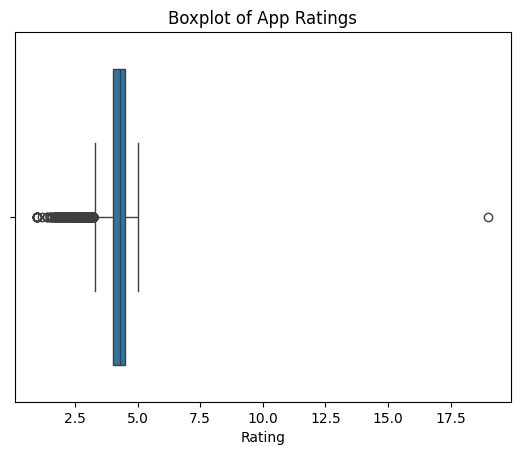

In [95]:
# boxplot the rating of the apps using seaborn
sns.boxplot(x="Rating", data=gp_df)
plt.title("Boxplot of App Ratings")

There seems to be an app with an extreme outlier rating, so we find and drop it.

In [96]:
gp_df[["App", "Category", "Rating", "Reviews"]].sort_values(
    by="Rating", ascending=False
).head(5)

,App,Category,Rating,Reviews
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M
5139,Chenoweth AH,MEDICAL,5.0,1
6851,BV Mobile Apps,PRODUCTIVITY,5.0,3
6807,Jabbla BT,TOOLS,5.0,3
6816,BU Study,FAMILY,5.0,7


In [97]:
gp_df.drop(gp_df[gp_df["Rating"] > 5].index, inplace=True)
gp_df[["App", "Category", "Rating", "Reviews"]].sort_values(
    by="Rating", ascending=False
).head(5)

,App,Category,Rating,Reviews
5139,Chenoweth AH,MEDICAL,5.0,1
7799,Cr Aviation Academy,FAMILY,5.0,7
7756,iReadMe,PRODUCTIVITY,5.0,8
7754,CricQuick,SPORTS,5.0,17
7731,CQ ESPM,BUSINESS,5.0,2


Text(0.5, 1.0, 'Boxplot of App Ratings')

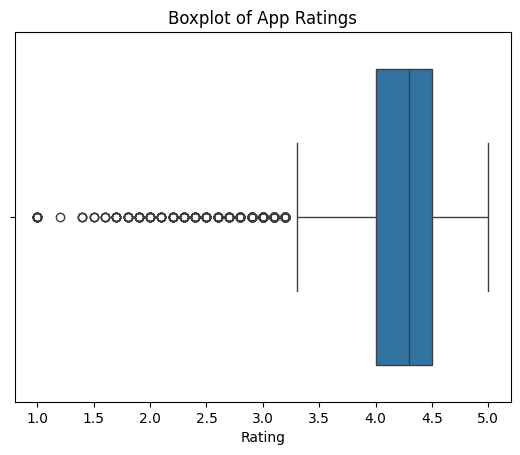

In [98]:
sns.boxplot(x="Rating", data=gp_df)
plt.title("Boxplot of App Ratings")

We see from this boxplot that the median app rating is quite high, at about 4.3. The majority of apps also lie in the ~3.2 - 5.0 range, with the apps with ratings falling below that range being outliers. This shows that the majority of apps published to the Play Store are quite well received.

### 2. Countplot of Apps by Category (r2)

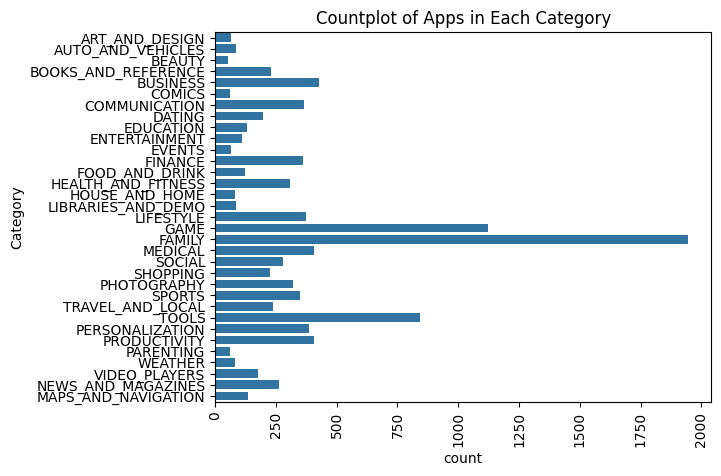

In [99]:
# countplot for the number of apps in each category
sns.countplot(y="Category", data=gp_df, orient="h")
plt.title("Countplot of Apps in Each Category")
plt.xticks(rotation=90)
plt.show()

We can see from this graph that family apps are by far the most popular type of app (meaning the most amount of competition), followed by games and tools. 

In [ ]:
# find unique last letters for the Size column
print(gp_df["Size"].str[-1].unique())

# drop instances that are nan, or whose size is 'Varies with device'
size_comp_df = gp_df[gp_df["Size"] != "Varies with device"]

# convert size column to numeric (standardize in megabytes, so divide by 1000 if k)
mask_k = size_comp_df["Size"].str.endswith("k", na=False)

size_comp_df["Size_MB"] = size_comp_df["Size"].str.replace("M", "", regex=True)
size_comp_df["Size_MB"] = size_comp_df["Size"].str.replace("k", "", regex=True)
# print(size_comp_df["Size_MB"])
# size_comp_df["Size_MB"] = pd.to_numeric(size_comp_df["Size_MB"], errors="coerce")
# print(size_comp_df.loc[mask_k, "Size_MB"])
# # size_comp_df.loc[mask_k, "Size_MB"] = size_comp_df.loc[mask_k, "Size_MB"] / 1000

size_comp_df[["Size", "Size_MB"]]

<StringArray>
['M', 'e', 'k']
Length: 3, dtype: str


,Size,Size_MB
0,19M,19M
1,14M,14M
2,8.7M,8.7M
3,25M,25M
4,2.8M,2.8M
...,...,...
10835,9.6M,9.6M
10836,53M,53M
10837,3.6M,3.6M
10838,9.5M,9.5M


In [ ]:
# plot rating vs installs

gp_df["Installs"].unique()

<StringArray>
[       '10,000+',       '500,000+',     '5,000,000+',    '50,000,000+',
       '100,000+',        '50,000+',     '1,000,000+',    '10,000,000+',
         '5,000+',   '100,000,000+', '1,000,000,000+',         '1,000+',
   '500,000,000+',            '50+',           '100+',           '500+',
            '10+',             '1+',             '5+',             '0+',
              '0']
Length: 21, dtype: str

### References

Google. *How Google Play Works*. (2026) https://google.play/howplayworks/.